# MNIST dataset introduction

## MNIST dataset

MNIST (Mixed [National Institute of Standards and Technology](https://en.wikipedia.org/wiki/National_Institute_of_Standards_and_Technology)) database is dataset for handwritten digits, distributed by Yann Lecun's [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/) website.

 - [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database)

The dataset consists of pair, "handwritten digit image" and "label". Digit ranges from 0 to 9, meaning 10 patterns in total.

 - handwritten digit image: This is gray scale image with size 28 x 28 pixel.
 - label : This is actual digit number this handwritten digit image represents. It is either  0 to 9.

![MNIST dataset example](images/mnist_plot.png)

Several samples of "handwritten digit image" and its "label" from MNIST dataset.

MNIST dataset is widely used for "classification", "image recognition" task. This is considered as relatively simple task, and often used for "Hello world" program in machine learning category. It is also often used to compare algorithm performances in research.

Handling MNIST dataset with Chainer

For these famous datasets like MNIST, Chainer provides utility function to prepare dataset. So you don't need to write preprocessing code by your own, downloading dataset from internet, and extract it, followed by formatting it etc... Chainer function do it for you!

Currently,

MNIST
CIFAR-10, CIFAR-100
Penn Tree Bank (PTB)
are supported, refer Official document for dataset.

Let's get familiar with MNIST dataset handling at first. Below codes are based on mnist_dataset.ipynb. To prepare MNIST dataset, you just need to call chainer.datasets.get_mnist function.

In [7]:
import numpy as np
import chainer

# Load the MNIST dataset from pre-inn chainer method
train, test = chainer.datasets.get_mnist()

If this is first time, it starts downloading the dataset which might take several minutes. From second time, chainer will refer the cached contents automatically so it runs faster.

You will get 2 returns, each of them corresponds to "training dataset" and "test dataset".

MNIST have total 70000 data, where training dataset size is 60000, and test dataset size is 10000.

In [8]:
# train[i] represents i-th data, there are 60000 training data
# test data structure is same, but total 10000 test data
print('len(train), type ', len(train), type(train))
print('len(test), type ', len(test), type(test))

len(train), type  60000 <class 'chainer.datasets.tuple_dataset.TupleDataset'>
len(test), type  10000 <class 'chainer.datasets.tuple_dataset.TupleDataset'>


I will explain about only train dataset below, but test dataset have same dataset format.

`train[i]` represents i-th data, type=tuple($ x_i $, $y_i $), where $ x_i $ is image data in array format with size 784, and $y_i$ is label data indicates actual digit of image.

In [9]:
print('train[0]', type(train[0]), len(train[0]))
# print(train[0])  # x_i = long array and y_i = label

train[0] <class 'tuple'> 2


$x_i $ information. You can see that image is represented as just an array of float numbers ranging from 0 to 1. MNIST image size is 28 × 28 pixel, so it is represented as 784 1-d array.

In [22]:
# train[i][0] represents x_i, MNIST image data,
# type=numpy(784,) vector <- specified by ndim of get_mnist()
print('train[0][0]', train[0][0].shape)
np.set_printoptions(threshold=10)  # set np.inf to print all.
print(train[0][0])

train[0][0] (784,)
[ 0.  0.  0. ...,  0.  0.  0.]


$y_i $ information. In below case you can see that 0-th image has label "5".

In [23]:
# train[i][1] represents y_i, MNIST label data(0-9), type=numpy() -> this means scalar
print('train[0][1]', train[0][1].shape, train[0][1])

train[0][1] () 5


Plotting MNIST

So, each i-th dataset consists of image and label
- train[i][0] or test[i][0]: i-th handwritten image
- train[i][1] or test[i][1]: i-th label

Below is a plotting code to check how images (this is just an array vector in python program) look like. This code will generate the MNIST image which was shown in the top of this articl

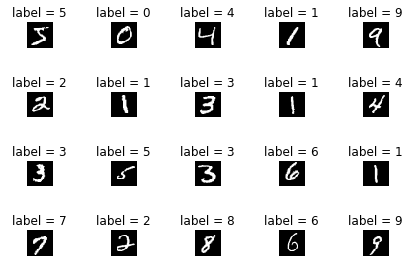

In [27]:
import os

import chainer
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

base_dir = 'src/mnist/images'

# Load the MNIST dataset from pre-inn chainer method
train, test = chainer.datasets.get_mnist(ndim=1)

ROW = 4
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = train[i][0].reshape(28, 28)   # not necessary to reshape if ndim is set to 2
    plt.subplot(ROW, COLUMN, i+1)          # subplot with size (width 3, height 5)
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
    # train[i][1] is i-th digit label
    plt.title('label = {}'.format(train[i][1]))
    plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.savefig(os.path.join(base_dir, 'mnist_plot.png'))
#plt.show()

[Hands on] Try plotting "test" dataset instead of "train" dataset.